In [1]:
%matplotlib inline

In [1]:
import io
import numpy as np
import PIL
import requests
import torch
import cv2

import openpifpaf as opf

In [3]:
pil_im = PIL.Image.open("./2/0001.jpg")#.convert('RGB')
im = np.asarray(pil_im)

In [4]:
with opf.show.image_canvas(im) as ax:
    pass


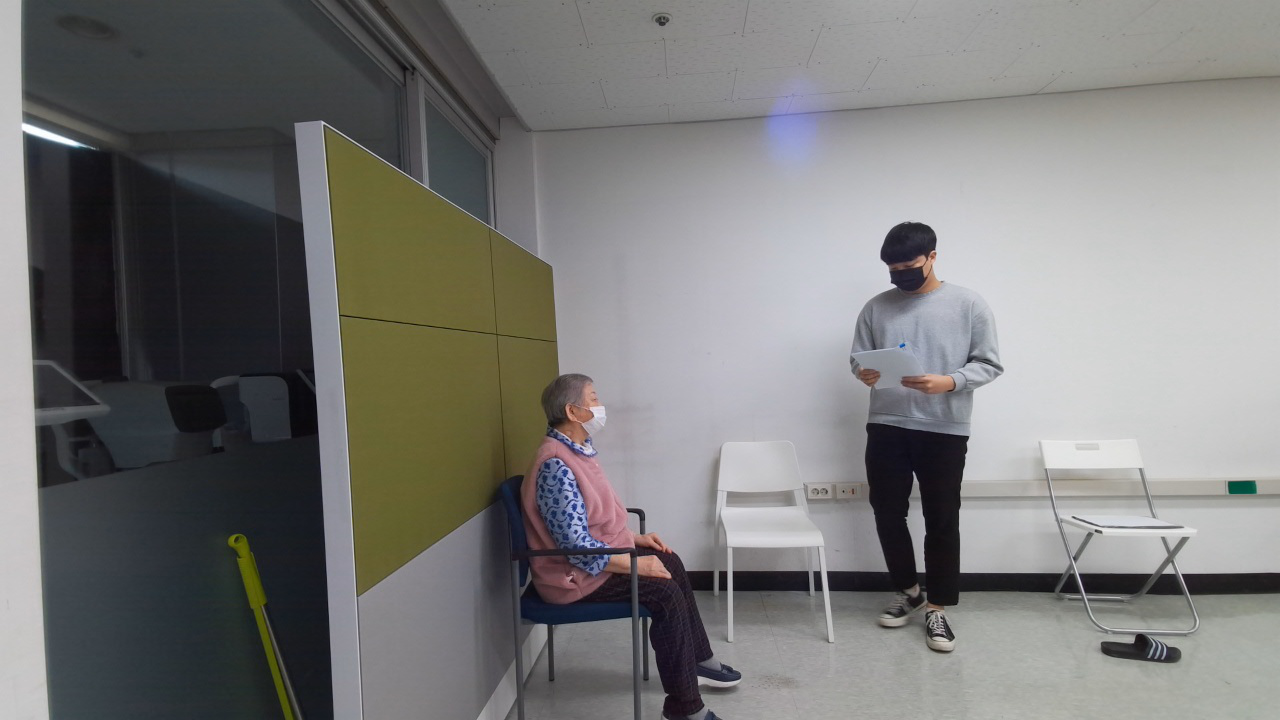

In [27]:
display(pil_im)

In [16]:
predictor = opf.Predictor(checkpoint='shufflenetv2k30')

In [17]:
predictions, gt_anns, image_meta = predictor.pil_image(pil_im)

/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer


In [28]:
annotation_painter = opf.show.AnnotationPainter()
with opf.show.image_canvas(im) as ax:
    annotation_painter.annotations(ax, predictions)

# Video 

In [2]:
import json
import logging
import os
import time

import torch

from openpifpaf import decoder, logger, network, show, visualizer, __version__
from openpifpaf.predictor import Predictor
from openpifpaf.stream import Stream

LOG = logging.getLogger(__name__)

from glob import glob

In [3]:
#parser = argparse.ArgumentParser()
class dummy():
    def __init__(self):
        pass
args = dummy()

In [ ]:
#for i_f, fn in enumerate(fnlist):
args.separate_debug_ax=False
args.debug_indices=None
args.batch_size=4
args.decoder_workers=4

out_dir = '/home/hoseung/Dropbox/DeepInsight/2021ETRI/BBS_data/Preds/'

glob_str = "./g1/a/1[6-9]?/BBS/RGB/*/*/*"
done=[]

fnlist = [fn for fn in glob(glob_str) if fn not in done]
fnlist.sort()

for fn in fnlist:
    _,_,cam, num, _, _, char, action, score=fn.split("/")   
    
    args.json_output = out_dir + f"{cam}_{num}_{char}_{action}_{score}.json"
    args.video_output = [None, "output.mp4"][0]
    args.source = fn+'/%4d.jpg'

    Predictor.loader_workers = 1
    predictor = Predictor(
        visualize_image=(not args.json_output or args.video_output),
        visualize_processed_image=None,
    )

    capture = Stream(args.source, preprocess=predictor.preprocess)

    annotation_painter = show.AnnotationPainter()
    animation = show.AnimationFrame(
        video_output=args.video_output,
        second_visual=args.separate_debug_ax,
    )
    if not args.json_output or args.video_output:
        ax, ax_second = animation.frame_init()
        visualizer.Base.common_ax = ax_second if args.separate_debug_ax else ax

    last_loop = time.perf_counter()
    for (ax, ax_second), (preds, _, meta) in \
            zip(animation.iter(), predictor.dataset(capture)):
        start_post = time.perf_counter()
        if args.json_output:
            with open(args.json_output, 'a+') as f:
                json.dump({
                    'frame': meta['frame_i'],
                    'predictions': [ann.json_data() for ann in preds]
                }, f, separators=(',', ':'))
                f.write('\n')
        if (not args.json_output or args.video_output) \
           and (args.separate_debug_ax or not args.debug_indices):
            image = visualizer.Base.image()
            ax.imshow(image)
            annotation_painter.annotations(ax, preds)
        postprocessing_time = time.perf_counter() - start_post
        if animation.last_draw_time is not None:
            postprocessing_time += animation.last_draw_time

        LOG.info('frame %d, loop time = %.0fms (pre = %.1fms, post = %.1fms), FPS = %.1f',
                 meta['frame_i'],
                 (time.perf_counter() - last_loop) * 1000.0,
                 meta['preprocessing_s'] * 1000.0,
                 postprocessing_time * 1000.0,
                 1.0 / (time.perf_counter() - last_loop))
        last_loop = time.perf_counter()
    
    done.append(fn)
    if len(done) % 100 ==99:
        # update fnlist every 100 vides
        fnlist = [fn for fn in glob(glob_str) if fn not in done]
        fnlist.sort()
    if len(fnlist) == 0:
        break

/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install

/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install

/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install

/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install

/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install

/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install

/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/occupancy.cpp:53: UserInfo: resizing occupancy buffer
/tmp/pip-install-gmky2j1q/openpifpaf_1f86fe3abbd84c24a1aa303ab8493b3e/openpifpaf/csrc/src/cif_hr.cpp:102: UserInfo: resizing cifhr buffer
/tmp/pip-install

In [43]:
done

['./g1/a/001/BBS/RGB/L/12/4',
 './g1/a/001/BBS/RGB/L/13/4',
 './g1/a/001/BBS/RGB/L/14/4']

In [ ]:
a = fnlist.pop()

In [ ]:
fnlist

In [ ]:
ll = [1,2,3,4]

for l  in ll:
    print(l)
    if l ==2:
        ll.append([3,4,5])

In [24]:
a

'./g1/e/043/BBS/RGB/L/1/0'

In [21]:
len(ll) % 3

1

In [10]:
ll = [1,2,3,4]

In [11]:
b = [1,2,3]

In [14]:
ll = [l for l in ll if l not in b]

In [33]:
ls

2/  output.json  PifPaf_test.ipynb


In [34]:
pwd

'/home/hoseung/Work/data/BBS/g1/a/002/RGB/L/2'